# Exploratory Data Analysis

- study of cleaned data through visualization to make sense out of it

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import seaborn as sns
import time
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.mlab as mlab
from scipy import stats

In [2]:
hdb_df = pd.read_csv('../datasets/hdb/hdb_resale_2015_2020_cleaned.csv')

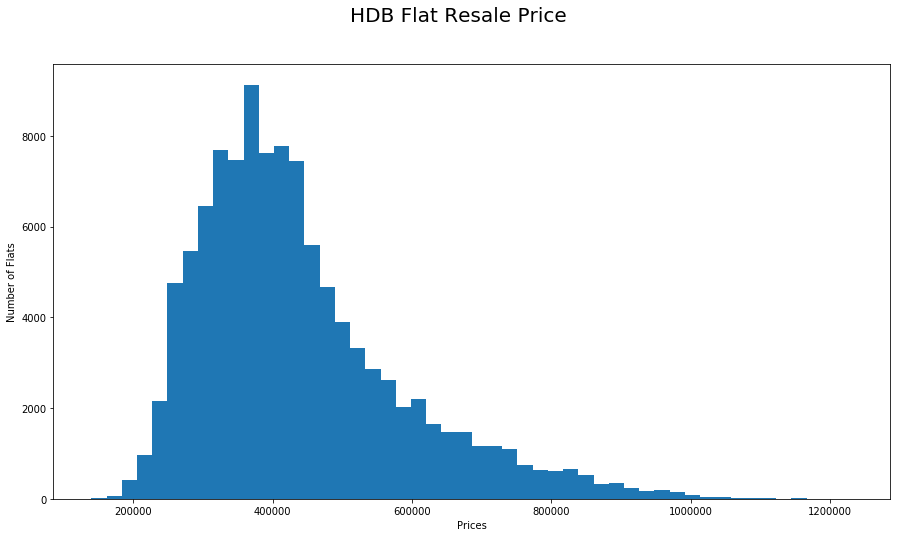

In [3]:
# Check target distribution

plt.figure(figsize=(15,8))
plt.suptitle('HDB Flat Resale Price', fontsize=20)
plt.hist(hdb_df['resale_price'],bins=50)

plt.xlabel('Prices')
plt.ylabel('Number of Flats')
plt.show()

Distribution of prices has the shape of a normal distribution with positive skewness. I will deal with this durng preprocessing.

### 1. Explore Flat Attributes

- Floor area
- Lease commence data
- Remaining lease
- Floor range
- Flat type (converted to dummy variables during data extraction)
- Flat model (converted to dummy variables during data extraction)

In [4]:
# check basic statistic of data
hdb_df.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,107468.0,97.460401,24.244908,31.0,77.0,95.0,112.0,280.0
lease_commence_date,107468.0,1992.815713,12.115581,1966.0,1984.0,1992.0,2001.0,2016.0
remaining_lease,107468.0,74.075781,12.037855,45.0,65.0,73.0,83.0,97.0
resale_price,107468.0,438032.844264,147723.758772,140000.0,333000.0,408000.0,506000.0,1232000.0
floor_range,107468.0,7.453958,5.601095,1.0,4.0,7.0,10.0,49.0
bedok,107468.0,0.057682,0.233143,0.0,0.0,0.0,0.0,1.0
bishan,107468.0,0.019196,0.137215,0.0,0.0,0.0,0.0,1.0
bukit_batok,107468.0,0.038607,0.192657,0.0,0.0,0.0,0.0,1.0
bukit_merah,107468.0,0.038616,0.192679,0.0,0.0,0.0,0.0,1.0
bukit_panjang,107468.0,0.038114,0.191472,0.0,0.0,0.0,0.0,1.0


#### Basic Statistics
- Average price of a HDB flat between 2015 and May 2020 is SGD 438,000 with standard deviation of SGD 148,000
- There were 107,000 resale transactions

### 1a. Linearity Check

Check for linearity between dependent variable and each numeric independent variable (floor area, lease_commence_date, remaining lease and storey). Floor area is the most important independent variable and so I will use it for a Hypotheses Test for Regression Slope


**Hypotheses Test for Regression Slope**<br /><br />
Step 1. State the Hypotheses
- Null hypothesis states that the slope is equal to zero.
- Alternative hypothesis states that the slope is not equal to zero
- If there is significant relationship betweem resale price and floor area, the slope will not be zero
- significant level = 0.05

In [5]:
# Step 2. Get the numbers
slope, intercept, r_value, p_value, std_err = stats.linregress(hdb_df['floor_area_sqm'], hdb_df['resale_price'])
print("slope: %f, intercept: %f, p-value:%f, standard error:%f " % (slope, intercept, p_value, std_err))
print("R-squared: %f" % r_value**2)

slope: 3900.682119, intercept: 57870.799816, p-value:0.000000, standard error:14.278305 
R-squared: 0.409847


Step 3. interpret result<br/>
Since the p-value  (zero) is less than the significant level (0.05), we cannot accept the null hypotheses and so there is significant relationship betweem resale price and floor area. That relationship is plotted below

<img src="../datasets/tableau/price_size.png" text="Price vs Floor Area">

The above plot shows Resale price and Floor Area have high positive correlation, but the most expensive flat is not the one with largest floor area, which means there are other factors that contribute to the price of a flat.

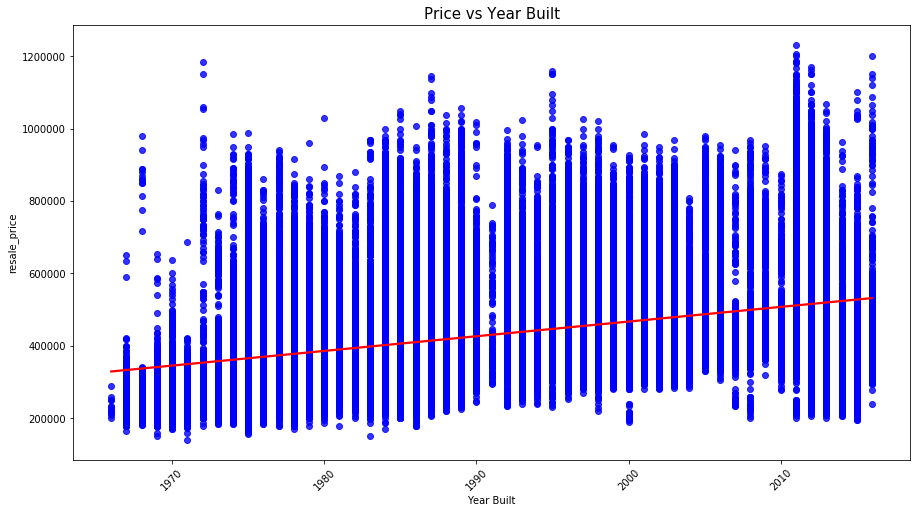

In [6]:
X = hdb_df['lease_commence_date']   #Year built
y = hdb_df['resale_price']


plt.figure(figsize=(15,8))
sns.regplot(X, y,ci=None, data=hdb_df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.xlabel('Year Built')
plt.title(label = 'Price vs Year Built', fontsize=15)
plt.xticks(Rotation='45')
plt.show();

The above plot shows Resale price and Year Built (Lease Commencement Date) have positive correlation

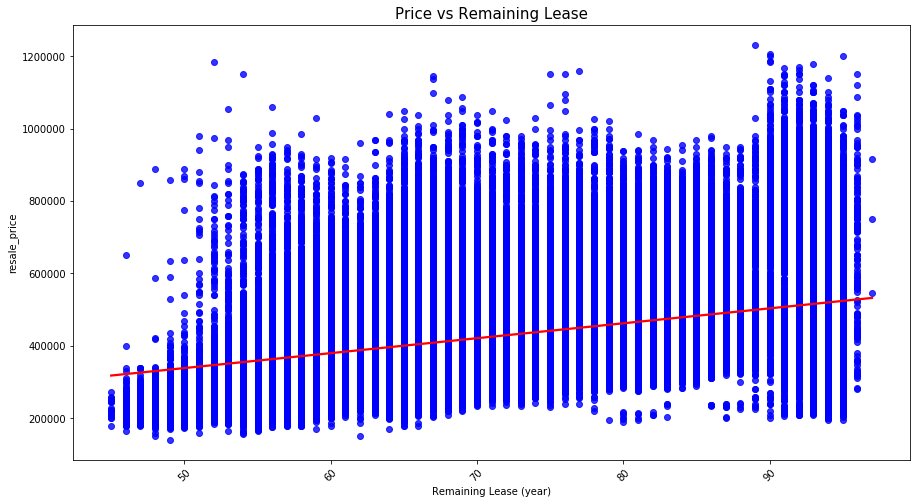

In [7]:
X = hdb_df['remaining_lease']
y = hdb_df['resale_price']

plt.figure(figsize=(15,8))
sns.regplot(X, y,ci=None, data=hdb_df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.xlabel('Remaining Lease (year)')
plt.title(label = 'Price vs Remaining Lease', fontsize=15)
plt.xticks(Rotation='45')
plt.show();

The above plot shows there is positive correlation between resale price and remaining lease. HDB flats are 99 years leasehold properties, so prices are affected by the remaining leases of flats.

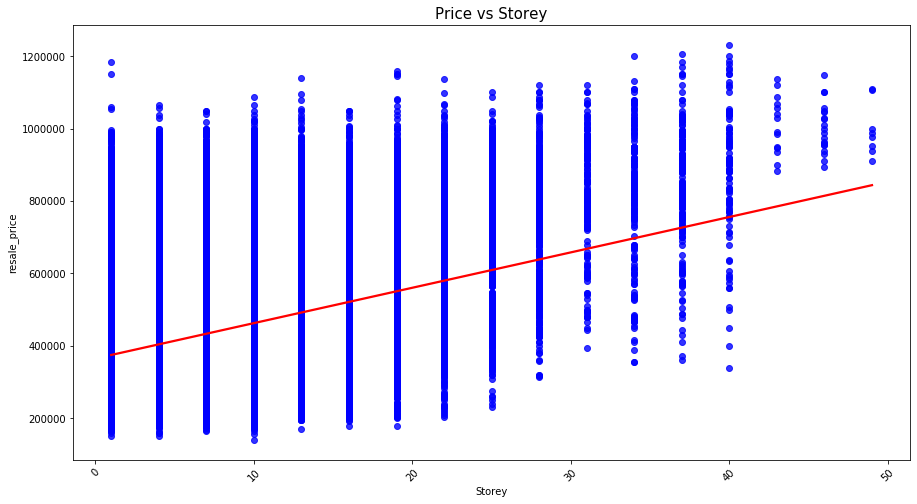

In [8]:
X = hdb_df['floor_range']
y = hdb_df['resale_price']

plt.figure(figsize=(15,8))
sns.regplot(X, y,ci=None, data=hdb_df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.xlabel('Storey')
plt.title(label = 'Price vs Storey', fontsize=15)
plt.xticks(Rotation='45')
plt.show();

The above plot shows there is positive correlation betwen resale prices and storey. 

Higher floors have better views and lesser noise from the road so buyers are willing pay more. 

### Results of Linearity Check
- Resale price has a positive linear relationship with floor_area_sqm, lease commencement date, remaining lease and storey

### 1b. Compare Prices with non-numeric features

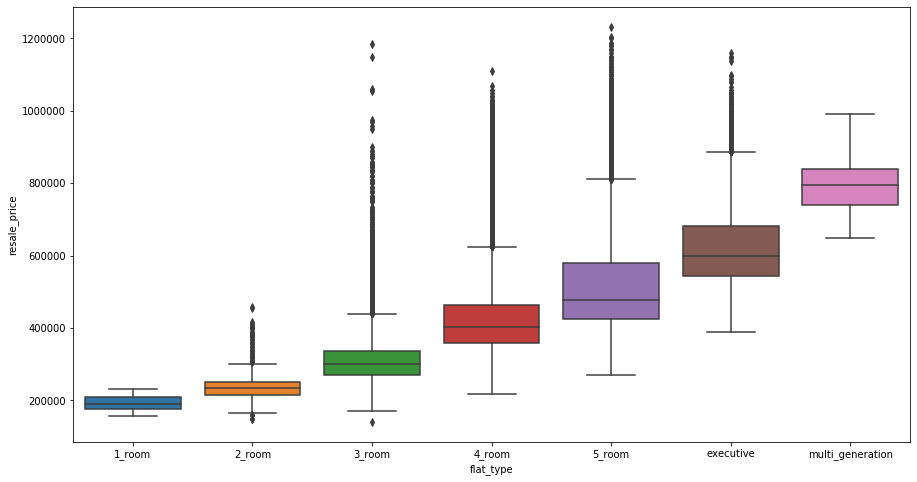

In [9]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="flat_type", y="resale_price", data=hdb_df, 
                 order=['1_room','2_room','3_room','4_room','5_room','executive','multi_generation'])

Flat type is about size, so 2 room flat is bigger than 1 room flat, and executive is bigger than 5 room. Multi Generation flats are the results of combining 2 small flats and they are generally bigger than executive flats.

The above plot shows the interquartile range and the median value for each flat type are moving higher with increasing flat size. However a small percentage of flats are selling at higher prices than the bigger ones, which means there are other factors influencing the prices of flats and I hope to find out by the end of this project.



With an increasing population and increasing land constraints the HDB flats in Singapore are getting smaller. HDB also stopped building the big Executive flats when they introduced Executive Condo, which are not included in this dataset because the resale of Executive Condo follows private property market regulations.  

The most common flat type today is 4-room flat, which meet the needs of smaller family units and Singapore's land constraints.

<img src="../datasets/tableau/vol_type.png" text="Volume by Flat Type">

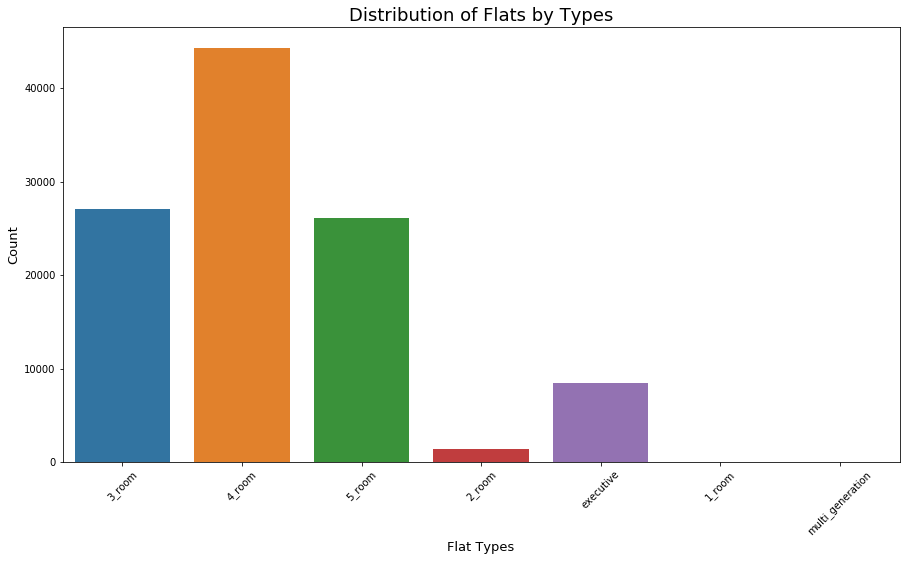

In [10]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="flat_type", data=hdb_df)
plt.xlabel('Flat Types',fontsize=13)
plt.ylabel('Count',fontsize=13)
plt.title(label = 'Distribution of Flats by Types', fontsize=18)
plt.xticks(Rotation='45');

<img src="../datasets/tableau/price_model2.png" text="Price vs Flat Models">

Flat models are about the design of flats, and there are 20 of them. Many owners cannot remember the models of their flats, except for models are dbss, maisonatte or terrace because they can be easily identified. I will consolidate the models during preprocessing to simplify feature selection of models.

The above plot shows the average prices for different models. The model with the highest average price is type_s2, and you can see that the name has no meaning. It is actually a flat at Pinnacle@Duxton, one of the special categories of flats that I will elaborate later.

<img src="../datasets/tableau/vol_model.png" text="Transaction by Model over time">

<img src="../datasets/tableau/volumeprice_town.png" text="Transaction Volume & Price by town">

The above plot shows the volume of transactions on the horizontal axis with a number showing the average flat price of each town.

Jurong West is the largest HDB town. Due to its proximity to the industrial estate and its distance from town, the prices of flats in Jurong West are below average.

On the other end is Bukit Timah - the smallest HDB town and most expensive by average price. Bukit Timah is better known for its expensive private landed properties.

### 1c. Special HDB properties

People frequently say they all HDB flats look the same, but there are some that are quite different and they generally command higher prices than normal.

1. Terrace house (landed property built by HDB) 
2. Penthhouse (Double-storey flats at the top of its block to provide good views)
3. Jumbo Flat (BIG flats made up of 2 smaller flats combined)
4. DBSS (designed and developed by private developers, supposedly to be of better designs)
5. Pinnacle@Duxton (tallest HDB blocks with the world's longest sky gardens)

Normally larger properties will command higher prices, but you can see from the plot below that the top 2 categories are also the smallest among the 5 categories. The most expensive flat at Pinnacle@Duxton command such as high price due to its central location, high floor and its unique 500m long sky garden.

<img src="../datasets/tableau/special_hdb.png" text="Special HDB Properties">

In [11]:
# HDB Terrace houses - Highest price is $1.185 million

hdb_df[hdb_df['flat_model']=='terrace'].describe()[['floor_area_sqm','lease_commence_date','resale_price']]

,floor_area_sqm,lease_commence_date,resale_price
count,65.000000,65.000000,6.500000e+01
mean,113.800000,1971.200000,8.144362e+05
std,49.459327,1.612452,1.143428e+05
min,78.000000,1968.000000,6.350000e+05
25%,83.000000,1972.000000,7.300000e+05
50%,94.000000,1972.000000,8.000000e+05
75%,112.000000,1972.000000,8.600000e+05
max,280.000000,1972.000000,1.185000e+06


In [12]:
# Penthhouses - Highest price is $1.138 million

hdb_df[(hdb_df['flat_model'].str.contains('maisonette',regex=True)) & 
       (hdb_df['floor_range']==19)].describe()[
    ['floor_area_sqm','lease_commence_date','resale_price']]

,floor_area_sqm,lease_commence_date,resale_price
count,4.0,4.000000,4.000000e+00
mean,159.0,1989.750000,9.907500e+05
std,8.0,6.184658,1.826169e+05
min,147.0,1986.000000,7.300000e+05
25%,159.0,1986.750000,9.385000e+05
50%,163.0,1987.000000,1.044000e+06
75%,163.0,1990.000000,1.096250e+06
max,163.0,1999.000000,1.145000e+06


In [13]:
# Jumbo Flats (combine 2 smaller flats into one) - Hgihest price is $900,000

hdb_df[hdb_df['flat_model']=='multi_generation'].describe()[['floor_area_sqm','lease_commence_date','resale_price']]

,floor_area_sqm,lease_commence_date,resale_price
count,38.000000,38.000000,38.000000
mean,164.289474,1987.078947,797909.263158
std,10.053661,0.273276,81090.073594
min,132.000000,1987.000000,650000.000000
25%,163.250000,1987.000000,740000.000000
50%,164.500000,1987.000000,793888.000000
75%,168.250000,1987.000000,840000.000000
max,179.000000,1988.000000,990000.000000


In [14]:
# DBSS (Design, Build and Sell Scheme) are flats developed by private developers
# They are supposedly better designs
# Highest price is $1.2 million

hdb_df[hdb_df['flat_model']=='dbss'].describe()[['floor_area_sqm','lease_commence_date','resale_price']]

,floor_area_sqm,lease_commence_date,resale_price
count,1284.000000,1284.000000,1.284000e+03
mean,101.962617,2011.386293,7.725995e+05
std,14.598930,1.494182,1.473403e+05
min,50.000000,2008.000000,3.000000e+05
25%,92.000000,2011.000000,6.745000e+05
50%,108.000000,2011.000000,7.740000e+05
75%,113.000000,2012.000000,8.757500e+05
max,120.000000,2014.000000,1.205000e+06


In [15]:
# Pinnacle@Duxton (central location with sky garden) - Highest price is $1.232 million

hdb_df[hdb_df['address'].str.contains('cantonment road')].describe()[
    ['floor_area_sqm','lease_commence_date','resale_price']]

,floor_area_sqm,lease_commence_date,resale_price
count,379.000000,379.0,3.790000e+02
mean,98.097625,2011.0,9.298564e+05
std,5.621055,0.0,8.604686e+04
min,93.000000,2011.0,6.500000e+05
25%,94.000000,2011.0,8.635000e+05
50%,95.000000,2011.0,9.200000e+05
75%,105.000000,2011.0,9.780000e+05
max,108.000000,2011.0,1.232000e+06


## Macroeconomic Factors

### Key Economic Indicators

In [16]:
# import the data files for Composite Index, PMI, GDP, unemployment rate and CPI

cli_df = pd.read_csv('../datasets/macro/cli_cleaned.csv')
pmi_df = pd.read_csv('../datasets/macro/pmi_cleaned.csv')
gdp_df = pd.read_csv('../datasets/macro/gdp_cleaned.csv')
unemp_df = pd.read_csv('../datasets/macro/unemployed_cleaned.csv')
cpi_df = pd.read_csv('../datasets/macro/cpi_cleaned.csv')

cli_df['date'] = pd.to_datetime(cli_df['date'])
pmi_df['date'] = pd.to_datetime(pmi_df['date'])
gdp_df['date'] = pd.to_datetime(gdp_df['date'])
unemp_df['date'] = pd.to_datetime(unemp_df['date'])
cpi_df['date'] = pd.to_datetime(cpi_df['date'])

cpi_df.set_index('date',inplace=True)
cli_df.set_index('date',inplace=True)
pmi_df.set_index('date',inplace=True)
gdp_df.set_index('date',inplace=True)
unemp_df.set_index('date',inplace=True)

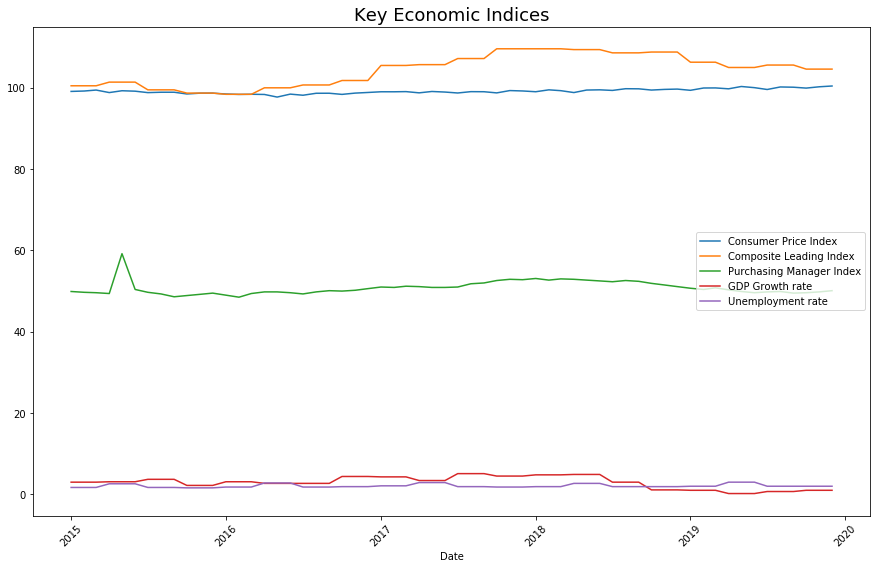

In [17]:
plt.figure(figsize=(15,9))
plt.plot(cpi_df[(cpi_df.index.year>2014) & (cpi_df.index.year<2020)]['cpi'], label="Consumer Price Index")
plt.plot(cli_df[(cli_df.index.year>2014) & (cli_df.index.year<2020)]['cli'], label="Composite Leading Index")
plt.plot(pmi_df[(pmi_df.index.year>2014) & (pmi_df.index.year<2020)]['pmi'], label="Purchasing Manager Index")
plt.plot(gdp_df[(gdp_df.index.year>2014) & (gdp_df.index.year<2020)]['gdp_growth'], label="GDP Growth rate")
plt.plot(unemp_df[(unemp_df.index.year>2014) & (unemp_df.index.year<2020)]['unemployed_rate'], label="Unemployment rate")

plt.xticks(Rotation='45')

#plt.ylabel('')
plt.xlabel('Date')
plt.title(label = 'Key Economic Indices', fontsize=18)
plt.legend()
plt.show();

The economic condition in Singapore started to slow down in 2019 and plunged into recession in 2020. Interesting to note that private housing index was still going strong in 2019 despite the economic condition. 

In [18]:
sibor_df = pd.read_csv('../datasets/macro/sibor_cleaned.csv')
cpf_df = pd.read_csv('../datasets/macro/cpf_cleaned.csv')

sibor_df['date'] = pd.to_datetime(sibor_df['date'])
cpf_df['date'] = pd.to_datetime(cpf_df['date'])

sibor_df.set_index('date',inplace=True)
cpf_df.set_index('date',inplace=True)

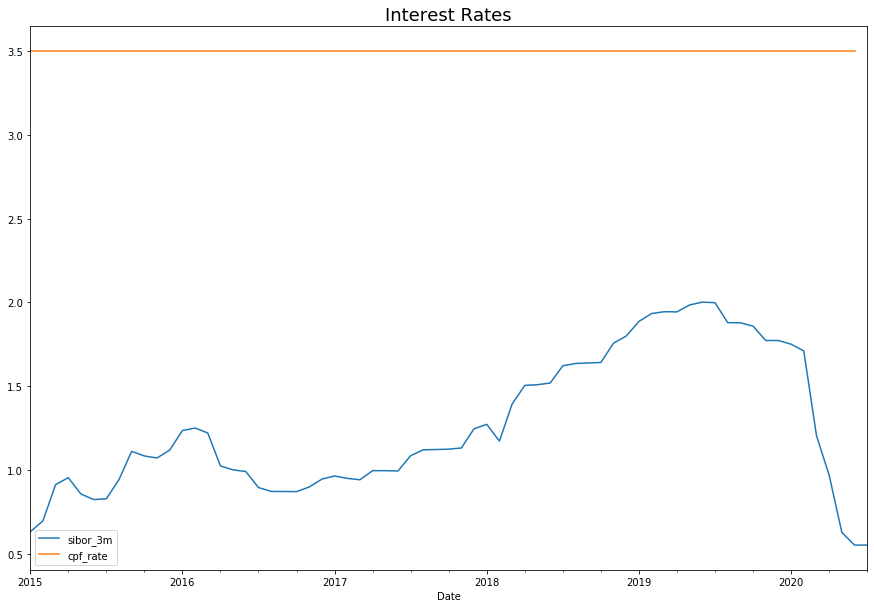

In [19]:
plt.figure(figsize=(15,10))

sibor_df[sibor_df.index.year>2014]['sibor_3m'].plot()
cpf_df[cpf_df.index.year>2014]['cpf_rate'].plot()

#plt.xlim(datetime.date(2015,1,1),datetime.date(2019,12,1))
plt.xlabel('Date')
plt.title(label = 'Interest Rates', fontsize=18)
plt.legend()
plt.show();

Bank's housing loans are pegged to 3-Month SIBOR rate, which has normally moved in opposite direction from the performance of the economy. On the other hand the CPF housing interest rate is relatively stable.

Most people purchased their HDB flats using CPF loan, which are usually lower than a loan from bank. For buyers with no regular CPF contributions they will not be able to take advantage of CPF rate.

When you take a housing loan from HDB, you will enjoy a concessionary interest rate. This concessionary interest rate is pegged at 0.10% above the prevailing CPF Ordinary Account (OA) interest rate, and may be adjusted in January, April, July, and October, in line with CPF interest rate revisions. [Source: HDB](https://www.hdb.gov.sg/cs/infoweb/residential/servicing-your-hdb-loan/mortgage-loan/interest-rate)

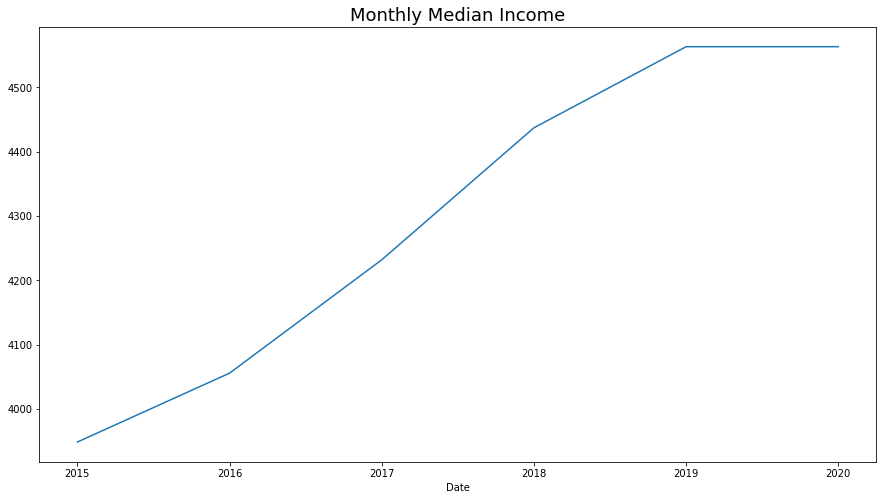

In [20]:
income_df = pd.read_csv('../datasets/macro/income_cleaned.csv')
income_df.set_index('year',inplace=True)

plt.figure(figsize=(15,8))
plt.plot(income_df[income_df.index>2014]['mth_income'])
plt.xlabel('Date')
plt.title(label = 'Monthly Median Income', fontsize=18)
plt.show();

The median income of residents has increased while the flat prices have dropped during the same period.

### Total and Married Residents

These 2 numbers represent the demand for flats. Most HDB flats buyers are married couples. Singles need to wait until they are 35 and there is restriction on the size of flat if they want to take advantage of government grant.

In [21]:
# import data from files

married_df = pd.read_csv('../datasets/macro/married_cleaned.csv')
pop_df = pd.read_csv('../datasets/macro/pop_cleaned.csv')

married_df.set_index('year',inplace=True)
pop_df.set_index('year',inplace=True)

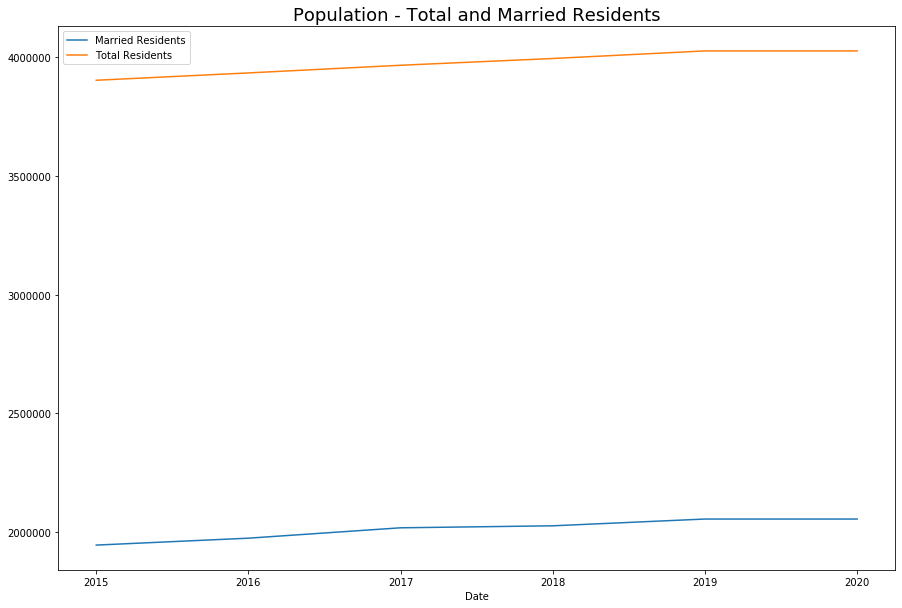

In [22]:
plt.figure(figsize=(15,10))

plt.plot(married_df[married_df.index>2014]['married'], label="Married Residents")
plt.plot(pop_df[pop_df.index>2014]['total_residents'], label="Total Residents")

plt.xlabel('Date')
plt.title(label = 'Population - Total and Married Residents', fontsize=18)
plt.legend()
plt.show();

Singapore population is growth slowly at betwen 0.9 and 1.7% per year in last few years. The government has built more than enough HDB flats to meet the demand and this explains the lower prices in the past few years.

Most buyers 

### Home Price Indices

In [23]:
hdb_index_df = pd.read_csv('../datasets/macro/hdb_index_cleaned.csv')
pte_index_df = pd.read_csv('../datasets/macro/pte_index_cleaned.csv')
condo_index_df = pd.read_csv('../datasets/macro/condo_index_cleaned.csv')

hdb_index_df['date'] = pd.to_datetime(hdb_index_df['date'])
pte_index_df['date'] = pd.to_datetime(pte_index_df['date'])
condo_index_df['date'] = pd.to_datetime(condo_index_df['date'])


hdb_index_df.set_index('date',inplace=True)
pte_index_df.set_index('date',inplace=True)
condo_index_df.set_index('date',inplace=True)

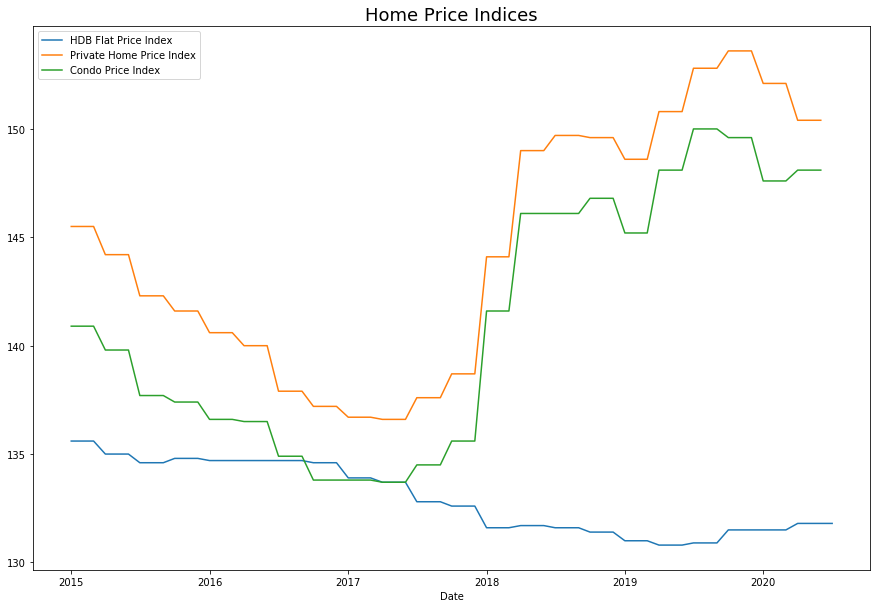

In [24]:
plt.figure(figsize=(15,10))

plt.plot(hdb_index_df[hdb_index_df.index.year>2014]['hdb_index'], label="HDB Flat Price Index")
plt.plot(pte_index_df[pte_index_df.index.year>2014]['pte_index'], label="Private Home Price Index")
plt.plot(condo_index_df[condo_index_df.index.year>2014]['condo_index'], label="Condo Price Index")

plt.xlabel('Date')
plt.title(label = 'Home Price Indices', fontsize=18)
plt.legend()
plt.show();

### Sales boosted by price drop in 2018

The above plot of HDB Price Index shows there is a big dip in HDB prices in 2018, which helps to boost the sale of HDB flats, which can be seen in the plot below (July 2018). In fact, the volume of HDB resale transaction was also high in Oct 2019, thanks to the [Enhanced CPF Housing Grant introduced in Sep 2019.](https://www.hdb.gov.sg/cs/infoweb/residential/buying-a-flat/resale/first-timers-applicants-scheme)

From the plot below we can see that transaction volume nose-dived in April and May 2020 due to COVIT-19 circuit breaker (lockdown).

From the same plot we can see seasonal dips in transaction volume in Feb (sometime Jan) because people were busy decorating their homes for Chinese New Year.

<img src="../datasets/tableau/sale_month.png" text="Number of Transactions per Month">

<img src="../datasets/tableau/vol_type_time.png" text="Transaction Volume over time">

### Lower Price and Larger Grant = Higher Volume
We have seen the HDB Price Index going south since 2015. Moving in the opposite direction is the transaction volume, lead by 4-room flats.
With lower prices and [higher grant (for first-timers)](https://www.hdb.gov.sg/cs/infoweb/residential/buying-a-flat/resale/first-timers-applicants-scheme) we can expect more buyers coming into the HDB resale market. The circuit breaker may have put a temporary dip in transaction, the trend is certainly for higher transaction volume.

### New Home Launches

In [25]:
bto_df = pd.read_csv('../datasets/macro/bto_flat_cleaned.csv')
new_pte_df = pd.read_csv('../datasets/macro/new_pte_home_yr.csv')

#bto_df['year'] = pd.to_datetime(bto_df['year'])
#new_pte_df['year'] = pd.to_datetime(new_pte_df['year'])

bto_df.set_index('year',inplace=True)
new_pte_df.set_index('year',inplace=True)

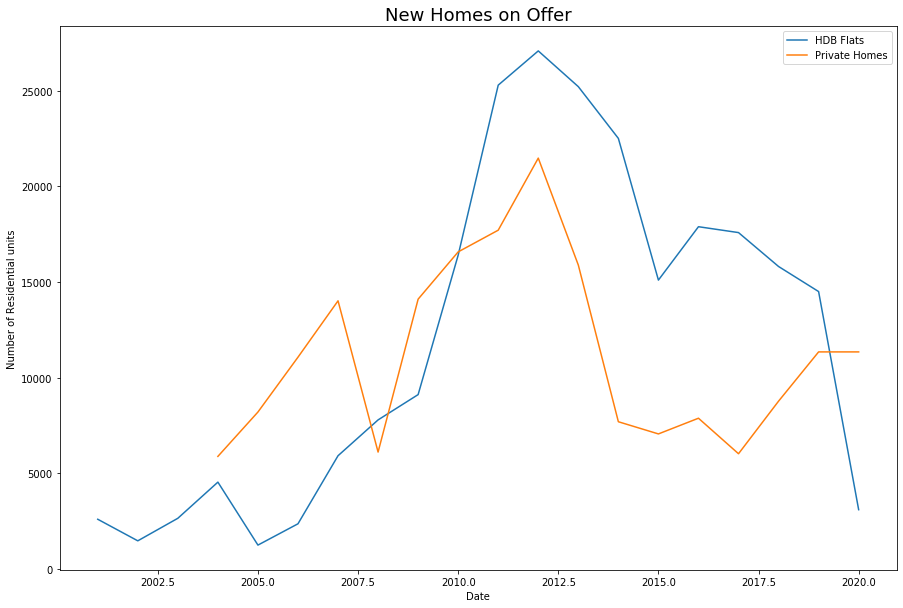

In [26]:
plt.figure(figsize=(15,10))

plt.plot(bto_df['new_flat_offered'], label="HDB Flats")
plt.plot(new_pte_df['new_pte_home_offered'], label="Private Homes")

plt.ylabel('Number of Residential units')
plt.xlabel('Date')
plt.title(label = 'New Homes on Offer', fontsize=18)
plt.legend()
plt.show();

Launches of new properties are the supply side of the story. Governemtn and market adjust the launches according to demand.